In [1]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('benchmark.csv', index_col=1)

In [4]:
df

,json file,max string size,string handling,assumptions,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],Parsing total [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Total time measured by GPU [ns],Total time measured by CPU [ns]
number of objects,,,,,,,,,,,,,,
100000,sample_100000.json,NaN,STATIC,none,32,4095,5639679,549376,10467230,10347999,119231,345867218,362527618,368156804
200000,sample_200000.json,NaN,STATIC,none,32,2144,10546688,918016,19945471,19828735,116736,694044799,725457092,736890428
300000,sample_300000.json,NaN,STATIC,none,32,3391,15717120,1265535,29089631,28993663,95968,1055995117,1102070800,1118333973
400000,sample_400000.json,NaN,STATIC,none,32,4095,21258047,1765568,38499837,38410270,89567,1401558227,1463085693,1485693012
500000,sample_500000.json,NaN,STATIC,none,32,2976,26564416,2033855,48328702,48228351,100351,1747113647,1824043579,1851647336
600000,sample_600000.json,NaN,STATIC,none,32,3295,31642335,2472032,57495677,57387134,108543,2094846923,2186460205,2219683262
700000,sample_700000.json,NaN,STATIC,none,32,3231,36975486,2869247,67300611,67215011,85600,2445350585,2552499023,2597928379
800000,sample_800000.json,NaN,STATIC,none,32,2047,40077121,3197119,76795580,76699165,96415,2803187500,2923259277,2966808889
900000,sample_900000.json,NaN,STATIC,none,32,3391,47147487,3551455,85760002,85664802,95200,3144182861,3280645263,3330369783


In [5]:
df.describe()

,max string size,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],Parsing total [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Total time measured by GPU [ns],Total time measured by CPU [ns]
count,0.0,9.0,9.000000,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000,9.000000e+00,9.000000e+00,9.000000e+00
mean,NaN,32.0,3185.000000,2.617426e+07,2.069134e+06,4.818697e+07,4.808613e+07,100845.666667,1.748016e+09,1.824450e+09,1.852835e+09
std,NaN,0.0,722.642201,1.405033e+07,1.039594e+06,2.588701e+07,2.589425e+07,11645.554280,9.581910e+08,9.991504e+08,1.014746e+09
min,NaN,32.0,2047.000000,5.639679e+06,5.493760e+05,1.046723e+07,1.034800e+07,85600.000000,3.458672e+08,3.625276e+08,3.681568e+08
25%,NaN,32.0,2976.000000,1.571712e+07,1.265535e+06,2.908963e+07,2.899366e+07,95200.000000,1.055995e+09,1.102071e+09,1.118334e+09
50%,NaN,32.0,3295.000000,2.656442e+07,2.033855e+06,4.832870e+07,4.822835e+07,96415.000000,1.747114e+09,1.824044e+09,1.851647e+09
75%,NaN,32.0,3391.000000,3.697549e+07,2.869247e+06,6.730061e+07,6.721501e+07,108543.000000,2.445351e+09,2.552499e+09,2.597928e+09
max,NaN,32.0,4095.000000,4.714749e+07,3.551455e+06,8.576000e+07,8.566480e+07,119231.000000,3.144183e+09,3.280645e+09,3.330370e+09


In [6]:
df.columns

Index(['json file', 'max string size', 'string handling', 'assumptions',
       'workgroup size', 'Initialization [ns]',
       'Memory allocation and copying [ns]', 'Finding newlines offsets [ns]',
       'Parsing total [ns]', 'JSON processing [ns]', 'Post kernel hooks [ns]',
       'Copying output [ns]', 'Total time measured by GPU [ns]',
       'Total time measured by CPU [ns]'],
      dtype='object')

In [21]:
alldf = df[['Initialization [ns]',
       'Memory allocation and copying [ns]', 'Finding newlines offsets [ns]',
       'JSON processing [ns]', 'Post kernel hooks [ns]','Copying output [ns]']]

In [7]:
subdf = df[['Initialization [ns]',
       'Memory allocation and copying [ns]', 'Finding newlines offsets [ns]',
       'JSON processing [ns]', 'Post kernel hooks [ns]']]

In [8]:
subdf

,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],JSON processing [ns],Post kernel hooks [ns]
number of objects,,,,,
100000,4095,5639679,549376,10347999,119231
200000,2144,10546688,918016,19828735,116736
300000,3391,15717120,1265535,28993663,95968
400000,4095,21258047,1765568,38410270,89567
500000,2976,26564416,2033855,48228351,100351
600000,3295,31642335,2472032,57387134,108543
700000,3231,36975486,2869247,67215011,85600
800000,2047,40077121,3197119,76699165,96415
900000,3391,47147487,3551455,85664802,95200


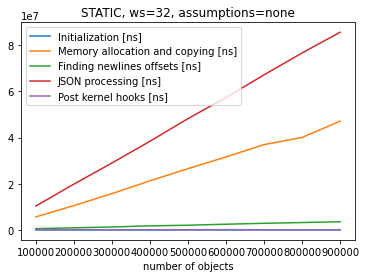

In [9]:
plt = subdf.plot(title='STATIC, ws=32, assumptions=none')

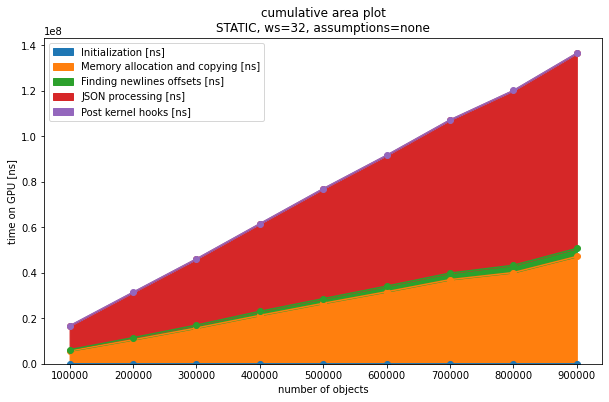

In [20]:
plt = subdf.plot(
    kind='area', grid=False, style='o-', #style=['.-','o-','x-','s-','+-'],
    title='cumulative area plot\nSTATIC, ws=32, assumptions=none',
    ylabel='time on GPU [ns]',
    figsize=(10,6)
)

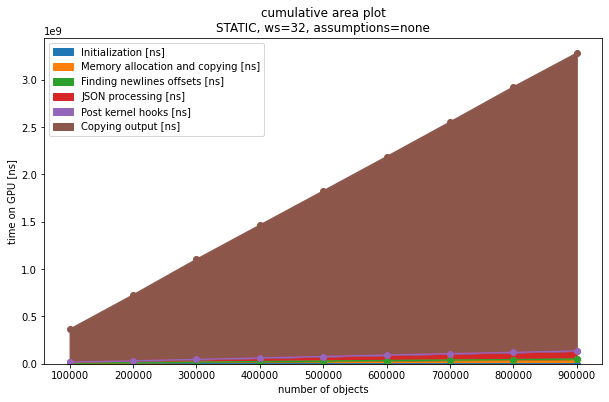

In [22]:
plt = alldf.plot(
    kind='area', grid=False, style='o-',
    title='cumulative area plot\nSTATIC, ws=32, assumptions=none',
    ylabel='time on GPU [ns]',
    figsize=(10,6)
)

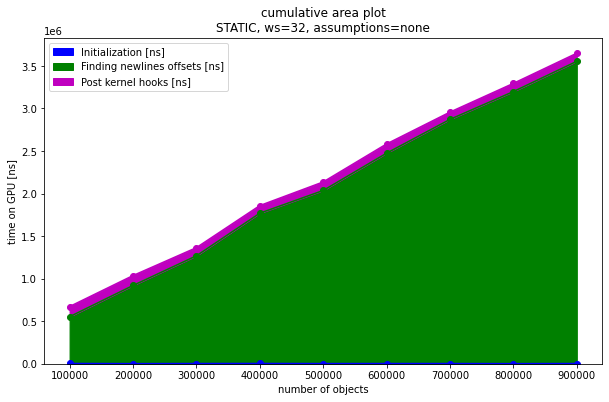

In [24]:
smalldf = df[['Initialization [ns]',
       'Finding newlines offsets [ns]',
       'Post kernel hooks [ns]']]
plt = smalldf.plot(
    kind='area', grid=False, style='o-', color=['b','g','m'],
    title='cumulative area plot\nSTATIC, ws=32, assumptions=none',
    ylabel='time on GPU [ns]',
    figsize=(10,6)
)

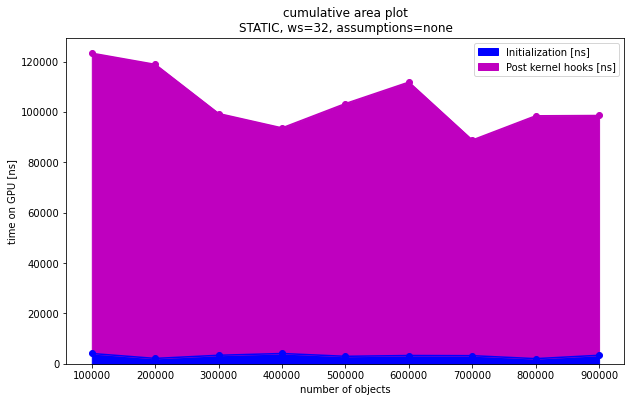

In [25]:
smallerdf = df[['Initialization [ns]',
       'Post kernel hooks [ns]']]
plt = smallerdf.plot(
    kind='area', grid=False, style='o-', color=['b','m'],
    title='cumulative area plot\nSTATIC, ws=32, assumptions=none',
    ylabel='time on GPU [ns]',
    figsize=(10,6)
)